# Decision making for opening a restaurant

## 1. Requirement for this assignment.

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


# 2. Transform the data into a pandas dataframe

In [3]:
# import the library we use to open URLs
import urllib.request

In [4]:
# specify which URL/web page we are going to be scraping
newyork_url = "https://en.wikipedia.org/wiki/New_York_City"

In [5]:
# open the url using urllib.request and put the HTML into the page variable
newyork_page = urllib.request.urlopen(newyork_url)

In [6]:
# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup

In [7]:
# parse the HTML from our URL into the BeautifulSoup parse tree format
newyork_soup = BeautifulSoup(newyork_page, "lxml")

### New York Historical  Population - Wikipedia

In [8]:
newyork_right_table=newyork_soup.find('table', class_='toccolours')
#newyork_right_table

In [9]:
newyork_A=[]
newyork_B=[]

for row in newyork_right_table.find_all('tr'):
    year_cells=row.find_all('th')
    cells=row.find_all('td')
    if len(cells)==2:
        y_p = cells[0].find(text=True)
        y_p = int(y_p.replace(',', ''))
        newyork_B.append(y_p)
        y_y = year_cells[0].find(text=True)
        y_y = int(y_y)
        newyork_A.append(y_y)

In [10]:
newyork_df=pd.DataFrame(newyork_A, columns=['Year'])
newyork_df['New York Population']=newyork_B
newyork_df

,Year,New York Population
0,1698,4937
1,1712,5840
2,1723,7248
3,1737,10664
4,1746,11717
5,1756,13046
6,1771,21863
7,1790,49401
8,1800,79216
9,1810,119734


### Toronto Historical  Population - Wikipedia

In [11]:
# specify which URL/web page we are going to be scraping
toronto_url = "https://en.wikipedia.org/wiki/Demographics_of_Toronto"

In [12]:
# open the url using urllib.request and put the HTML into the page variable
toronto_page = urllib.request.urlopen(toronto_url)

In [13]:
# parse the HTML from our URL into the BeautifulSoup parse tree format
toronto_soup = BeautifulSoup(toronto_page, "lxml")
toronto_right_table=toronto_soup.find('table', class_='toccolours')

In [14]:
toronto_A=[]
toronto_B=[]

for row in toronto_right_table.findAll('tr'):
    year_cells=row.findAll('th')
    cells=row.findAll('td')
    if len(cells)==2:
        t_p = cells[0].find(text=True)
        t_p = int(t_p.replace(',', ''))
        toronto_B.append(t_p)
        t_y = year_cells[0].find(text=True)
        t_y = int(t_y)-1
        toronto_A.append(t_y)

In [16]:
toronto_df=pd.DataFrame(toronto_A, columns=['Year'])
toronto_df['Toronto Population']=toronto_B
toronto_df

,Year,Toronto Population
0,1833,9252
1,1900,238080
2,1910,381383
3,1920,521893
4,1930,856955
5,1940,951549
6,1950,1176622
7,1960,1824481
8,1970,2089729
9,1975,2124291


### NewYork and Toronto merge

In [17]:
merge_df = pd.merge(newyork_df, toronto_df, how='outer')
merge_dfs = merge_df.sort_values(by=['Year'])
merge_dfs.set_index('Year', inplace=True)

In [18]:
merge_dfs1 = merge_dfs[merge_dfs.index > 1899]

In [19]:
merge_dfs2 = merge_dfs1.fillna(method='ffill', limit=1) # fill values forward with limit
merge_dfs2

,New York Population,Toronto Population
Year,,
1900,3437202.0,238080.0
1910,4766883.0,381383.0
1920,5620048.0,521893.0
1930,6930446.0,856955.0
1940,7454995.0,951549.0
1950,7891957.0,1176622.0
1960,7781984.0,1824481.0
1970,7894862.0,2089729.0
1975,7894862.0,2124291.0


In [20]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [21]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


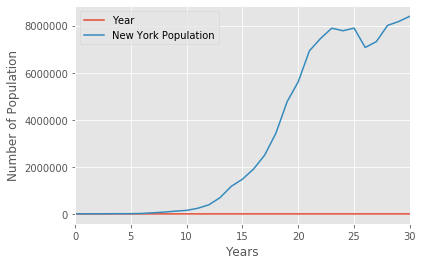

In [22]:
newyork_df.plot(kind='line')
plt.ylabel('Number of Population')
plt.xlabel('Years')
plt.show()

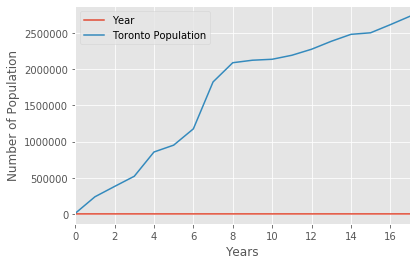

In [23]:
toronto_df.plot(kind='line')
plt.ylabel('Number of Population')
plt.xlabel('Years')
plt.show()

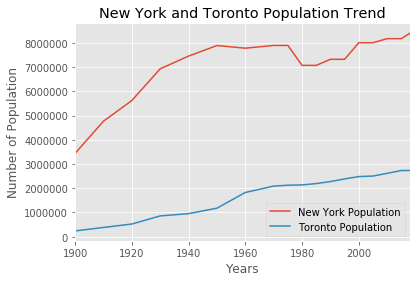

In [24]:
# merg2 = merge_dfs2.plot()
merge_dfs2.plot(kind='line')

plt.title('New York and Toronto Population Trend')
plt.ylabel('Number of Population')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

### New York and Toronro comparsion

|    item     | New York           | Toronro  |
| ------------- |:-------------:| -----:|
|Population       | 8,175,133 | 2,954,024 |
| Population Density (/sq mi)      | 27,751      |   12,140 |
|GDP (US$ billion) | 842.3  (2018)   |   276.3  (2014) |

# 3. Choice for Borough in New York City

In [25]:
#newyork_Boroughs_table=newyork_soup.find('table', class_='wikitable sortable jquery-tablesorter')
newyork_Boroughs_table=newyork_soup.find('table', class_='wikitable sortable')

In [26]:
newyork_Boroughs_A=[]
newyork_Boroughs_B=[]
newyork_Boroughs_C=[]
newyork_Boroughs_D=[]
newyork_Boroughs_E=[]
newyork_Boroughs_F=[]
newyork_Boroughs_G=[]
newyork_Boroughs_H=[]
newyork_Boroughs_I=[]

for row in newyork_Boroughs_table.find_all('tr'):
    year_cells=row.find_all('th')
    cells=row.find_all('td')
    if len(cells)==9:
        y_p_A = cells[0].find(text=True)
        newyork_Boroughs_A.append(y_p_A)
        y_p_B = cells[1].find(text=True)
        y_p_B= y_p_B.replace('\n', '')
        newyork_Boroughs_B.append(y_p_B)
        y_p_C = cells[2].find(text=True)
        y_p_C= y_p_C.replace('\n', '')
        newyork_Boroughs_C.append(y_p_C)
        y_p_D = cells[3].find(text=True)
        y_p_D= y_p_D.replace('\n', '')
        newyork_Boroughs_D.append(y_p_D)
        y_p_E = cells[4].find(text=True)
        y_p_E= y_p_E.replace('\n', '')
        newyork_Boroughs_E.append(y_p_E)
        y_p_F = cells[5].find(text=True)
        y_p_F= y_p_F.replace('\n', '')
        newyork_Boroughs_F.append(y_p_F)
        y_p_G = cells[6].find(text=True)
        y_p_G= y_p_G.replace('\n', '')
        newyork_Boroughs_G.append(y_p_G)
        y_p_H = cells[7].find(text=True)
        y_p_H= y_p_H.replace('\n', '')
        newyork_Boroughs_H.append(y_p_H)
        y_p_I = cells[8].find(text=True)
        y_p_I= y_p_I.replace('\n', '')
        newyork_Boroughs_I.append(y_p_I)
    elif len(cells)==8:
        y_p_A = cells[0].find(text=True)
        newyork_Boroughs_A.append(y_p_A)
        y_p_B = ''
        newyork_Boroughs_B.append(y_p_B)
        y_p_C = cells[1].find(text=True)
        y_p_C= y_p_C.replace('\n', '')
        newyork_Boroughs_C.append(y_p_C)
        y_p_D = cells[2].find(text=True)
        y_p_D= y_p_D.replace('\n', '')
        newyork_Boroughs_D.append(y_p_D)
        y_p_E = cells[3].find(text=True)
        y_p_E= y_p_E.replace('\n', '')
        newyork_Boroughs_E.append(y_p_E)
        y_p_F = cells[4].find(text=True)
        y_p_F= y_p_F.replace('\n', '')
        newyork_Boroughs_F.append(y_p_F)
        y_p_G = cells[5].find(text=True)
        y_p_G= y_p_G.replace('\n', '')
        newyork_Boroughs_G.append(y_p_G)
        y_p_H = cells[6].find(text=True)
        y_p_H= y_p_H.replace('\n', '')
        newyork_Boroughs_H.append(y_p_H)
        y_p_I = cells[7].find(text=True)
        y_p_I= y_p_I.replace('\n', '')
        newyork_Boroughs_I.append(y_p_I)

In [27]:
newyork_Boroughs_df=pd.DataFrame(newyork_Boroughs_A, columns=['Borough'])
newyork_Boroughs_df['County']=newyork_Boroughs_B
newyork_Boroughs_df['Population']=newyork_Boroughs_C
newyork_Boroughs_df['Gross Domestic Product (billons US$)']=newyork_Boroughs_D
newyork_Boroughs_df['Gross Domestic Product (per capita US$)']=newyork_Boroughs_E
newyork_Boroughs_df['Land area (square miles)']=newyork_Boroughs_F
newyork_Boroughs_df['Land area (square km)']=newyork_Boroughs_G
newyork_Boroughs_df['Density (persons / sq. mi)']=newyork_Boroughs_H
newyork_Boroughs_df['Density (persons / sq. km)']=newyork_Boroughs_I
newyork_Boroughs_df

,Borough,County,Population,Gross Domestic Product (billons US$),Gross Domestic Product (per capita US$),Land area (square miles),Land area (square km),Density (persons / sq. mi),Density (persons / sq. km)
0,The Bronx,Bronx,"1,432,132",42.695,"29,200",42.10,109.04,"34,653","13,231"
1,Brooklyn,Kings,"2,582,830",91.559,"34,600",70.82,183.42,"37,137","14,649"
2,Manhattan,New York,"1,628,701",600.244,"360,600",22.83,59.13,"72,033","27,826"
3,Queens,Queens,"2,278,906",93.310,"39,600",108.53,281.09,"21,460","8,354"
4,Staten Island,Richmond,"476,179",14.514,"30,300",58.37,151.18,"8,112","3,132"
5,City of New York,,"8,398,748",842.343,"97,700",302.64,783.83,"28,188","10,947"
6,State of New York,,"19,745,289","1,701.399","85,700","47,214","122,284",416.4,159


# 4. Search Neighborhoods in Manhattan

In [28]:
# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup

# specify which URL/web page we are going to be scraping
Manhattan_neighborhoods_url = "https://en.wikipedia.org/wiki/List_of_Manhattan_neighborhoods"

# open the url using urllib.request and put the HTML into the page variable
Manhattan_neighborhoods_page = urllib.request.urlopen(Manhattan_neighborhoods_url)

# parse the HTML from our URL into the BeautifulSoup parse tree format
Manhattan_neighborhoods_soup = BeautifulSoup(Manhattan_neighborhoods_page, "lxml")
#Manhattan_neighborhoods_soup

## Five downtown of Manhattan, New York city

In [29]:
Manhattan_neighborhoods_table=Manhattan_neighborhoods_soup.find('table', class_='nowraplinks')
#Manhattan_neighborhoods_table

In [30]:
Manhattan_neighborhoods_A=[]
Manhattan_neighborhoods_B=[]
Manhattan_neighborhoods_B1=[]
Manhattan_neighborhoods_B2=[]
Manhattan_neighborhoods_B3=[]
Manhattan_neighborhoods_B4=[]
Manhattan_neighborhoods_B5=[]
Manhattan_neighborhoods_B6=[]
Manhattan_neighborhoods_B_len=[]
i = 0
for row in Manhattan_neighborhoods_table.find_all('tr'):
    if i == 0:
        th_cells = row.find_all('th')
        th_cells_a = th_cells[0].find_all('a')  
        i += 1
    else:
        if i < 6:
            th_cells = row.find_all('th')
            th_cells_a = th_cells[0].find_all('a')
            y_y = th_cells_a[0].find(text=True)
            Manhattan_neighborhoods_A.append(y_y)
        td_cells = row.find_all('td')
        td_cells_ul = td_cells[0].find_all('ul')
        td_cells_ul_li = td_cells_ul[0].find_all('li')
        for li in td_cells_ul_li:
            neighborhood = li.find(text=True)
            if i == 1:
                Manhattan_neighborhoods_B1.append(neighborhood)
            elif i == 2:
                Manhattan_neighborhoods_B2.append(neighborhood)
            elif i == 3:
                Manhattan_neighborhoods_B3.append(neighborhood)
            elif i == 4:
                Manhattan_neighborhoods_B4.append(neighborhood)
            elif i == 5:
                Manhattan_neighborhoods_B5.append(neighborhood)
            else:
                break
        i += 1
len(Manhattan_neighborhoods_B1)

25

## Neighborhoods Numbers of Five downtown in Manhattan

In [31]:
Manhattan_neighborhoods_df=pd.DataFrame(Manhattan_neighborhoods_A, columns=['Manhanttan downtown'])
Manhattan_neighborhoods_B = [Manhattan_neighborhoods_B1, Manhattan_neighborhoods_B2, Manhattan_neighborhoods_B3, Manhattan_neighborhoods_B4, Manhattan_neighborhoods_B5]
M_B1_len = len(Manhattan_neighborhoods_B1)
M_B2_len = len(Manhattan_neighborhoods_B2)
M_B3_len = len(Manhattan_neighborhoods_B3)
M_B4_len = len(Manhattan_neighborhoods_B4)
M_B5_len = len(Manhattan_neighborhoods_B5)
Manhattan_neighborhoods_B_len =[M_B1_len, M_B2_len, M_B3_len, M_B4_len, M_B5_len]
Manhattan_neighborhoods_df['Neighborhoods Numbers']=Manhattan_neighborhoods_B_len
Manhattan_neighborhoods_df['Neighborhoods']=Manhattan_neighborhoods_B
Manhattan_neighborhoods_df

,Manhanttan downtown,Neighborhoods Numbers,Neighborhoods
0,Lower Manhattan,25,"[Alphabet City, Battery Park City, Bowery, Chi..."
1,Midtown,11,"[Columbus Circle, Diamond District, Flatiron D..."
2,West Side,12,"[Chelsea, Hell's Kitchen, Hudson Yards, develo..."
3,East Side,16,"[Carnegie Hill, Gramercy Park, Kips Bay, Lenox..."
4,Upper Manhattan,14,"[Astor Row, East Harlem, Hamilton Heights, Har..."


In [32]:
neighborhoods_df = Manhattan_neighborhoods_df['Neighborhoods'][1]

In [33]:
neighborhood_df = pd.DataFrame(neighborhoods_df, columns=['Midtown'])
neighborhood_df

,Midtown
0,Columbus Circle
1,Diamond District
2,Flatiron District
3,Garment District
4,Herald Square
5,Koreatown
6,Madison Square
7,NoMad
8,Silicon Alley
9,Theater District


## Venues Numbers in Neighborhoods by Foursquare API

In [34]:
address = []
latitude_list = []
longitude_list = []
for neighborhood in Manhattan_neighborhoods_df['Neighborhoods'][1]:
    address = neighborhood + ', New York, NY'
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    try:
        latitude = location.latitude
        longitude = location.longitude
    except:
        latitude = ''
        longitude = ''
    latitude_list.append(latitude)
    longitude_list.append(longitude)

In [35]:
address = []
latitude_list = []
longitude_list = []
venue_len_list = []
for neighborhood in Manhattan_neighborhoods_df['Neighborhoods'][1]:
    address = neighborhood + ', New York, NY'
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    try:
        latitude = location.latitude
        longitude = location.longitude
        CLIENT_ID = 'EM1ADUZZU3VQ2SYZ5QCZZJM4BQVZFBVGZ0C2LJ1QRK1RTFV4' # your Foursquare ID
        CLIENT_SECRET = '5AH3XD0QGPDTT4WFFASFPCSEKWCFKASWTMDLZZBEO0ZYSHJX' # your Foursquare Secret
        VERSION = '20180604'
        search_query = ''
        radius = 1000
        LIMIT = 200
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        results = requests.get(url).json()
        # assign relevant part of JSON to venues
        venues = results['response']['venues']
        # tranform venues into a dataframe
        dataframe = json_normalize(venues)
        venue_len = len(dataframe)
    except:
        latitude = ''
        longitude = ''
    latitude_list.append(latitude)
    longitude_list.append(longitude)
    venue_len_list.append(venue_len)

In [36]:
neighborhood_df['latitude'] = latitude_list
neighborhood_df['longitude'] = longitude_list
neighborhood_df['Venue numbers'] = venue_len_list
neighborhood_df['Venue numbers'].sum()

1356

In [37]:
Manhattan_neighborhoods_df['Venue numbers'] = [2768, 1356, 1242, 1561, 1228]
Manhattan_neighborhoods_df['Venue per Neighborhoods'] = [111, 123, 104, 98, 88]
Manhattan_neighborhoods_df

,Manhanttan downtown,Neighborhoods Numbers,Neighborhoods,Venue numbers,Venue per Neighborhoods
0,Lower Manhattan,25,"[Alphabet City, Battery Park City, Bowery, Chi...",2768,111
1,Midtown,11,"[Columbus Circle, Diamond District, Flatiron D...",1356,123
2,West Side,12,"[Chelsea, Hell's Kitchen, Hudson Yards, develo...",1242,104
3,East Side,16,"[Carnegie Hill, Gramercy Park, Kips Bay, Lenox...",1561,98
4,Upper Manhattan,14,"[Astor Row, East Harlem, Hamilton Heights, Har...",1228,88


# 5. Decision of Neighborhoods in Midtown -> Flatiron District

In [38]:
neighborhood_df['Venue numbers'] = venue_len_list
neighborhood_df

,Midtown,latitude,longitude,Venue numbers
0,Columbus Circle,40.7681,-73.9819,118
1,Diamond District,40.7572,-73.9801,128
2,Flatiron District,40.7411,-73.9897,133
3,Garment District,40.7537,-73.9905,125
4,Herald Square,40.7495,-73.988,120
5,Koreatown,40.7476,-73.9865,128
6,Madison Square,42.8759,-75.6803,121
7,NoMad,40.7447,-73.9883,119
8,Silicon Alley,,,119
9,Theater District,40.758,-73.9855,123


## Map of Neighborhoods in Midtown

In [39]:
address = '102 North End Ave, New York, NY'
address1 = 'Midtown, New York, NY'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address1)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7622684 -73.9795443


In [52]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Midtown',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(latitude_list, longitude_list, neighborhood_df.Midtown):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# 6. Search Venues in Flatiron District by Foursquare API

In [53]:
CLIENT_ID = 'EM1ADUZZU3VQ2SYZ5QCZZJM4BQVZFBVGZ0C2LJ1QRK1RTFV4' # your Foursquare ID
CLIENT_SECRET = '5AH3XD0QGPDTT4WFFASFPCSEKWCFKASWTMDLZZBEO0ZYSHJX' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 20

In [54]:
search_query = 'korean'
radius = 500

In [55]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [56]:
results = requests.get(url).json()
#results

In [57]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
print(dataframe.shape)
len(dataframe)
dataframe.head()

(6, 17)


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4a52ac4ef964a520e5b11fe3,Korean Pro,"[{'id': '4bf58dd8d48988d113941735', 'name': 'K...",v-1583393536,False,62 W 56th St,at 6th Ave.,40.763404,-73.977167,"[{'label': 'display', 'lat': 40.76340383711987...",236,10019,US,New York,NY,United States,"[62 W 56th St (at 6th Ave.), New York, NY 1001..."
1,5a96b1a0d4cc987c4a7344dc,Korean Air Offices,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1583393536,False,10 E 53rd St,5th Ave,40.759687,-73.975566,"[{'label': 'display', 'lat': 40.759687230922, ...",441,10022,US,New York,NY,United States,"[10 E 53rd St (5th Ave), New York, NY 10022, U..."
2,51c475aa498e73948caf7ebd,Korean Market,"[{'id': '4bf58dd8d48988d113941735', 'name': 'K...",v-1583393536,False,NaN,NaN,40.763979,-73.985287,"[{'label': 'display', 'lat': 40.763979, 'lng':...",520,NaN,US,New York,NY,United States,"[New York, NY, United States]"
3,5b7450cc82a750002cb63c1a,KumGangSan Korean Restaurant,"[{'id': '4bf58dd8d48988d113941735', 'name': 'K...",v-1583393536,False,16 W 48th St,NaN,40.757530,-73.979326,"[{'label': 'display', 'lat': 40.75752999999999...",527,10036,US,New York,NY,United States,"[16 W 48th St, New York, NY 10036, United States]"
4,4f076211e4b090ef20d24084,Korean Air Offices,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1583393536,False,609 5th Ave,W 50th St.,40.757624,-73.977526,"[{'label': 'display', 'lat': 40.75762433612029...",544,10017,US,New York,NY,United States,"[609 5th Ave (W 50th St.), New York, NY 10017,..."


In [58]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
#dataframe_filtered
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dd = dataframe_filtered.columns
dd

Index(['name', 'categories', 'address', 'crossStreet', 'lat', 'lng',
       'labeledLatLngs', 'distance', 'postalCode', 'cc', 'city', 'state',
       'country', 'formattedAddress', 'id'],
      dtype='object')

In [59]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
dd = dataframe_filtered
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Korean Pro,Korean Restaurant,62 W 56th St,at 6th Ave.,40.763404,-73.977167,"[{'label': 'display', 'lat': 40.76340383711987...",236,10019,US,New York,NY,United States,"[62 W 56th St (at 6th Ave.), New York, NY 1001...",4a52ac4ef964a520e5b11fe3
1,Korean Air Offices,Office,10 E 53rd St,5th Ave,40.759687,-73.975566,"[{'label': 'display', 'lat': 40.759687230922, ...",441,10022,US,New York,NY,United States,"[10 E 53rd St (5th Ave), New York, NY 10022, U...",5a96b1a0d4cc987c4a7344dc
2,Korean Market,Korean Restaurant,NaN,NaN,40.763979,-73.985287,"[{'label': 'display', 'lat': 40.763979, 'lng':...",520,NaN,US,New York,NY,United States,"[New York, NY, United States]",51c475aa498e73948caf7ebd
3,KumGangSan Korean Restaurant,Korean Restaurant,16 W 48th St,NaN,40.757530,-73.979326,"[{'label': 'display', 'lat': 40.75752999999999...",527,10036,US,New York,NY,United States,"[16 W 48th St, New York, NY 10036, United States]",5b7450cc82a750002cb63c1a
4,Korean Air Offices,Office,609 5th Ave,W 50th St.,40.757624,-73.977526,"[{'label': 'display', 'lat': 40.75762433612029...",544,10017,US,New York,NY,United States,"[609 5th Ave (W 50th St.), New York, NY 10017,...",4f076211e4b090ef20d24084
5,B O B Korean Spicy Restaurant,Korean Restaurant,68,NaN,40.766729,-73.982621,"[{'label': 'display', 'lat': 40.76672878222091...",560,10110,US,Asoke,NY,United States,"[68, Asoke, NY 10110, United States]",4c7c9b689efda143f64a86e2


## Map of Korean food in Midtown

In [60]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Midtown',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map